In [ ]:
- Load the Data
   - Kaggle
   - Local
   - URL
   - Google Drive
   - Company's database
- Clean the Data
- Analyze & Visualize
   - Asking & Answering Questions
- Feature Engineering
- Splitting the Data
- Preprocessing the Data
- Fit the model
- Evaluate the model - accuracy, precision, recall, F1 score & AUC-ROC curve
- Improve the model score - manual hyperparameter tuning, GridSearchCV & K-fold Crossvalidation
- Predictions for test set
- Feature Importance - 10
- Drop unimportant columns
   - Fit the model
   - Evaluate the model - accuracy, precision, recall, F1 score & AUC-ROC curve
   - Improve the model - manual hyperparameter tuning, GridSearchCV & K-fold Crossvalidation
   - Predictions for test set
- Save the model

In [ ]:
10 million rows - 

In [ ]:
100K-150K

In [ ]:
500K-800K

In [ ]:
80-20

In [ ]:
correlation - relationship b/w two numerical columns

In [ ]:
correlation - categorical columns


In [ ]:
yes, no

temperature

In [ ]:
df.corr()

In [ ]:
plot - across x-axis - categories


y-axis - numerical column

# Unsupervised Machine Learning - PCA (Principal Component Analysis)

<img src="https://turingfinance.com/wp-content/uploads/2014/10/Dimensionality.png" height=400 width=400>


## Dimensionality Reduction with PCA

> Principal Component Analysis (PCA) is a popular technique for dimensionality reduction in machine learning and data analysis. It works by identifying the directions (or principal components) in which the data varies the most and projecting the data onto these directions while preserving the maximum amount of variance. Singular Value Decomposition (SVD) is a common method for computing PCA as it provides a numerically stable and efficient way to decompose the data matrix into its principal components.

Here's a step-by-step guide on how PCA can be used for dimensionality reduction:

1. **Standardize the Data**: PCA is sensitive to the scale of the features, so it's essential to standardize the data by subtracting the mean and scaling to unit variance.

2. **Compute the Covariance Matrix**: PCA works by finding the directions of maximum variance in the data. To do this, you need to compute the covariance matrix of the standardized data.

![](https://i.imgur.com/jaLuGIU.png)

3. **Compute Eigenvectors and Eigenvalues**: The eigenvectors of the covariance matrix represent the principal components, and the corresponding eigenvalues represent the amount of variance explained by each principal component. Larger eigenvalues correspond to principal components that capture more variance in the data.

![](https://i.imgur.com/ihukWbI.png)

4. **Select Principal Components**: Decide how many principal components to retain based on the explained variance ratio or other criteria like the cumulative explained variance.

5. **Project the Data onto the Principal Components**: Once you have chosen the number of principal components to retain, you can project the original data onto these components to obtain the reduced-dimensional representation.


### Task 1: PCA on Iris Dataset

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

In [27]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
from sklearn.decomposition import PCA

# PCA reducing to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [26]:
X_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [30]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_69515/3001376907.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:, 1], cmap='viridis')
/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_69515/3001376907.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,2], X[:, 3], cmap='viridis');


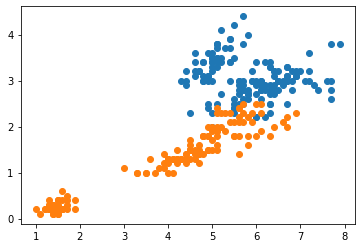

In [39]:
plt.scatter(X[:,0], X[:, 1], cmap='viridis')
plt.scatter(X[:,2], X[:, 3], cmap='viridis');

/var/folders/1q/461kwq6d42j7t8d6yytb5nyw0000gp/T/ipykernel_69515/730429130.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


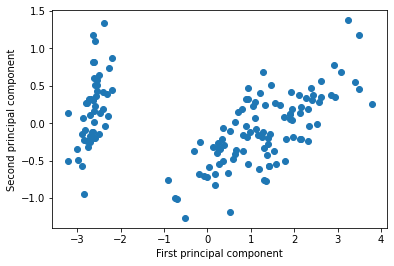

In [36]:
from sklearn.decomposition import PCA

# PCA reducing to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the PCA-transformed version
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [33]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


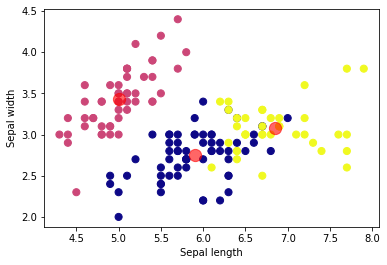

In [31]:
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.6)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

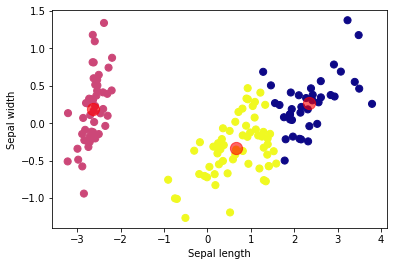

In [35]:
# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=150, alpha=0.6)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

### Interpretation

1. **Import PCA:**

```python
from sklearn.decomposition import PCA
```
This line imports the PCA class from the scikit-learn decomposition library.

2. **Create PCA Object:**

```python
pca = PCA(n_components=2)
```

This line creates a PCA object named pca. The argument n_components=2 specifies that we want to reduce the data to two principal components.

3. **Data Transformation:**

```python
X_pca = pca.fit_transform(X)
```

- `X` represents your original dataset.
- The `fit_transform` method performs two steps:
     - **Fit:** It analyzes the data to identify the components that explain the most variance.
     - **Transform:** It transforms the original data (X) into a new dataset (X_pca) using the identified principal components. This new data will have two dimensions (as specified by `n_components=2`).
     
4. **Plotting the PCA-transformed Data:**

```python
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()
```

- This code creates a scatter plot using `plt.scatter`.
    - The first two arguments `(X_pca[:, 0] and X_pca[:, 1])` specify the data points for the x and y axes, which are the first and second principal components of the transformed data (X_pca).
    - The argument `c=iris.target` sets the color of each data point based on the target variable (likely from the Iris dataset, a common example used in PCA).
    - `cmap='viridis'` defines the color map used to represent the target variable.
- The `plt.xlabel` and `plt.ylabel` set labels for the x and y axes, respectively.
- `plt.show()` displays the scatter plot.

5. **Output Interpretation:**

The output represents a scatter plot where each data point is colored according to its class label in the Iris dataset (assuming iris.target refers to the Iris dataset classes). The axes represent the first and second principal components, which capture the most significant variations in the original data. Ideally, these components will help separate the data points belonging to different classes into distinct clusters.

By analyzing the distribution of the data points in the plot, you can see if PCA successfully separated the Iris flower classes into well-defined clusters. If the clusters are well-separated, it suggests that PCA effectively reduced the dimensionality while preserving the important information for classification.

### Task 2: Explained Variance Ratio

Understanding how much variance is captured by each principal component.

In [ ]:
#0.24, 0.04

In [6]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


### Interpretation

The output from **pca.explained_variance_ratio_** indicates the proportion of the dataset's total variance that is captured by each of the Principal Component Analysis (PCA) components.

- The first principal component accounts for approximately 92.46% of the variance in the dataset. This means that it captures most of the information and is the most significant pattern in the data.
- The second principal component accounts for approximately 5.31% of the variance in the dataset. Although it adds some information, it is much less significant than the first component.

The sum of these two ratios is approximately 97.77%, which means that these two components together capture most of the variability in the data, with only about 2.23% of the variance left unexplained by these two dimensions.

When you reduce the dimensionality of data using PCA, you aim to capture as much variance as possible with the fewest number of principal components. The **explained_variance_ratio_** helps to understand the effectiveness of this reduction. In many cases, a high percentage of variance explained by the first few components indicates that you can use them as a compressed representation of the full dataset with minimal loss of information.